In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
sample_size = 100

Text(0.5, 1.0, 'Two Class Dataset')

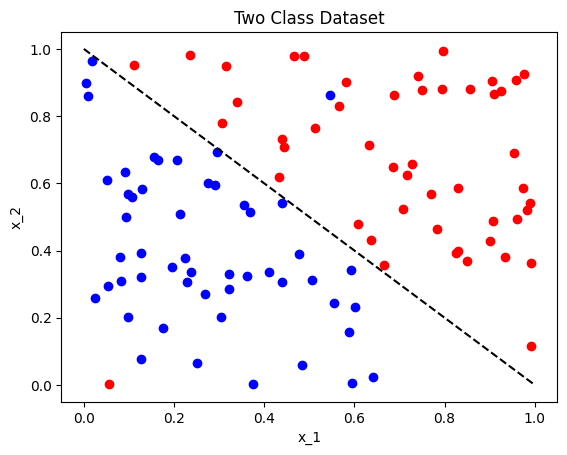

In [32]:
# define a two cross two dataset, with two classes
# x_1 lies in (0, 1) and x_2 lies in (0, 1)

x_1 = np.random.uniform(0, 1, sample_size)
x_2 = np.random.uniform(0, 1, sample_size)
x = np.array([x_1, x_2]).T

y = np.where(np.bitwise_xor((x_1 + x_2 > 1), np.random.choice([np.False_, np.True_], size=sample_size, p=[0.97, 0.03])), 0, 1)

# plot the dataset

plt.scatter(x_1[y == 0], x_2[y == 0], color='red', label='Class 0')
plt.scatter(x_1[y == 1], x_2[y == 1], color='blue', label='Class 1')
plt.plot([0, 1], [1, 0], color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Two Class Dataset')


In [103]:
import autograd.numpy as anp
from autograd import grad 
rs = anp.random.RandomState(0)
from autograd.misc.optimizers import adam

verbose = True

def loss(params, X, Y, lambda_reg=0.01):
    pred_y = forward(params, X)
    data_loss = -anp.mean(Y * anp.log(pred_y + 1e-15) + (1 - Y) * anp.log(1 - pred_y + 1e-15))
    reg_loss = (lambda_reg / 2) * (anp.sum(W1**2) + anp.sum(W2**2))
    return data_loss + reg_loss

def forward(params, X):
    W1, b1, W2, b2 = params
    z1 = X @ W1  + b1
    a1 = anp.tanh(z1)
    z2 = a1 @ W2  + b2
    a2 = 1 / (1 + anp.exp(-z2))
    return a2

# Have to define the data variables here because functions \batch_indices need them
num_epochs = 1000
num_batches = 10
batch_size = sample_size // num_batches
X = x  
Y = y.reshape(-1, 1)  
train_X, train_Y = X[:80, :], Y[:80]  
test_X, test_Y = X[80:, :], Y[80:]

def accuracy(params, X, Y):
    pred_y = forward(params, X)
    pred_labels = (pred_y >= 0.5).astype(int)
    return np.mean(pred_labels == Y)

def print_perf(params, iter, gradient):
    if iter % (num_batches * 30) == 0:
        train_acc = accuracy(params, train_X, train_Y)
        test_acc = accuracy(params, test_X, test_Y)
        if verbose: 
            print(f"iter: {iter // num_batches:6}| train accuracy: {train_acc:6}| test accuracy: {test_acc:6}")

def batch_indices(iter):
    idx = iter % num_batches
    return slice(idx * batch_size, (idx + 1) * batch_size)

def objective(params, iter):
    indices = batch_indices(iter)
    X_batch = X[indices]
    Y_batch = Y[indices]

    return loss(params, X_batch, Y_batch)


In [104]:

input_size = 2  
hidden_size = 5  
output_size = 1  

rs = anp.random.RandomState(23)

W1 = rs.randn(input_size, hidden_size)
b1 = anp.zeros(hidden_size)
W2 = rs.randn(hidden_size, output_size)
b2 = anp.zeros(output_size)

params = (W1, b1, W2, b2)

optimized_params = adam(grad(objective), params, step_size=0.01, num_iters=num_epochs, callback=print_perf)

print("Trained parameters:", params)

iter:      0| train accuracy: 0.5125| test accuracy:    0.4
iter:     30| train accuracy:  0.975| test accuracy:   0.95
iter:     60| train accuracy:  0.975| test accuracy:   0.95
iter:     90| train accuracy:  0.975| test accuracy:   0.95
Trained parameters: (array([[ 0.66698806,  0.02581308, -0.77761941,  0.94863382,  0.70167179],
       [-1.05108156, -0.36754812, -1.13745969, -1.32214752,  1.77225828]]), array([0., 0., 0., 0., 0.]), array([[-0.34745899],
       [ 0.67014016],
       [ 0.32227152],
       [ 0.06034293],
       [-1.04345   ]]), array([0.]))


In [105]:
random_states = np.arange(0, 30, )
combined_w1 = []
verbose = False
for random_seed in random_states:
    rs = np.random.RandomState(random_seed)
    W1 = rs.randn(input_size, hidden_size)
    b1 = anp.zeros(hidden_size)
    W2 = rs.randn(hidden_size, output_size)
    b2 = anp.zeros(output_size)

    params = (W1, b1, W2, b2)

    optimized_params = adam(grad(objective), params, step_size=0.01, num_iters=num_epochs, callback=print_perf)
    combined_w1.append(
        optimized_params[0]
    )


In [ ]:
openai_api_key = "Zm9jY2FsbGluZy1hcGkta2V5"
claude_api_key = "rb3Y2xhdWRlLWFwaS1rZXk"
voltage_api_key = "LeZ2Vsb2NpdHktYXBpLWtleQ"


Text(0.5, 1.0, 'Combined W1 Curves')

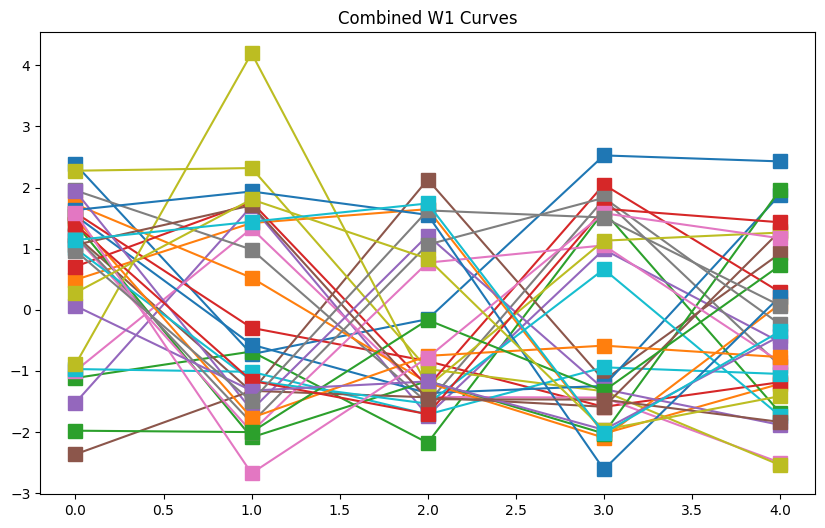

In [107]:
plt.figure(figsize=(10, 6))
for curve in combined_w1:
    plt.plot(curve[0, :], marker='s', markersize=10)  # BEGIN: Change to big squares
plt.title('Combined W1 Curves')  # END: Change to big squares


In [110]:
random_states = np.arange(0, 30, )
combined_w1 = []
verbose = False
hidden_size = 1
for random_seed in random_states:
    rs = np.random.RandomState(random_seed)
    W1 = rs.randn(input_size, hidden_size)
    b1 = anp.zeros(hidden_size)
    W2 = rs.randn(hidden_size, output_size)
    b2 = anp.zeros(output_size)

    params = (W1, b1, W2, b2)

    optimized_params = adam(grad(objective), params, step_size=0.01, num_iters=num_epochs, callback=print_perf)
    combined_w1.append(
        optimized_params[0]
    )

accuracy_score = accuracy(optimized_params, test_X, test_Y)
print("Final test accuracy:", accuracy_score)



Final test accuracy: 0.95


Text(0.5, 1.0, 'Combined W1 Curves')

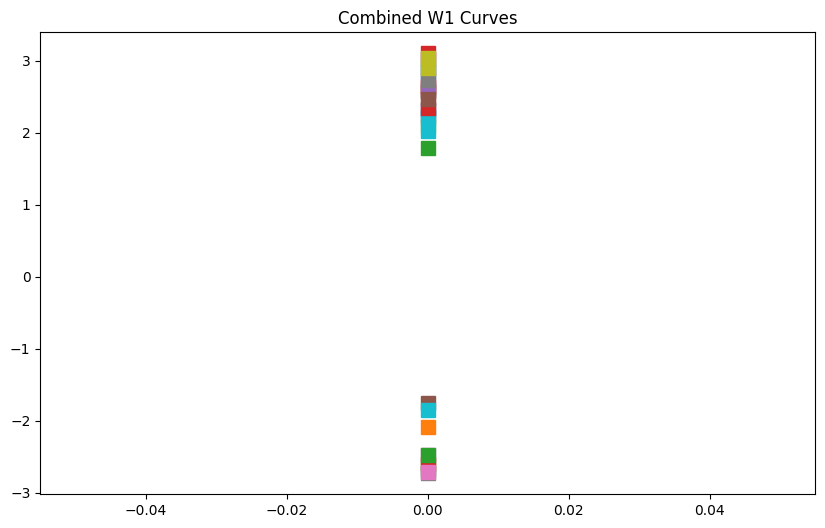

In [113]:
plt.figure(figsize=(10, 6))
for curve in combined_w1:
    plt.plot(curve[0, :], marker='s', markersize=10)  # BEGIN: Change to big squares
plt.title('Combined W1 Curves')  # END: Change to big squares


Text(0.5, 1.0, 'Combined W1 (complete vector) Curves')

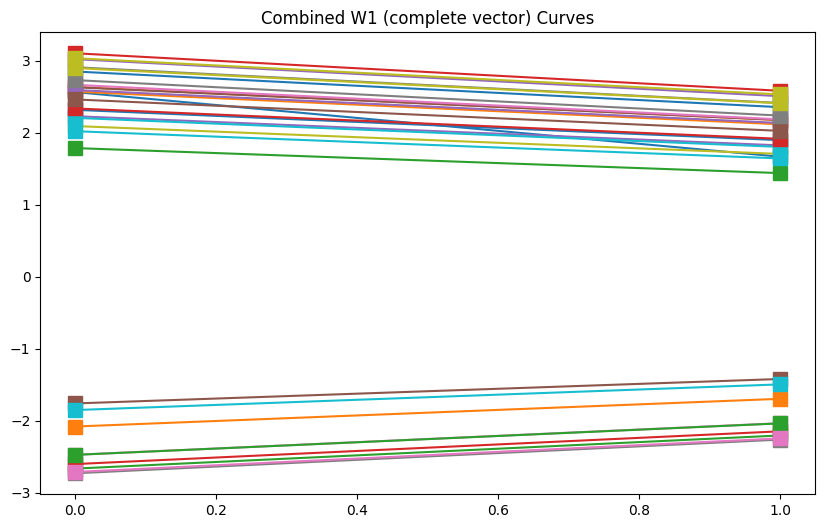

In [114]:
plt.figure(figsize=(10, 6))
for curve in combined_w1:
    plt.plot(curve[:, :], marker='s', markersize=10)  # BEGIN: Change to big squares
plt.title('Combined W1 (complete vector) Curves')  # END: Change to big squares
